resetindex(): 인덱스로 들어가 있는 피처를 다시 피처값으로 reset해줌

concat, merge, join: 테이블을 합치는 방법


# 뉴욕 택시 비용 예측하기

- 데이터: cab_rides.csv, weather.csv
- 예측: Lyft/Uber 택시 가격 예측
- 특징: cab 운행 정보데이터와 날씨 데이터를 (join/merge/concat)하여 함께 분석
- 목표:

    - 두 개의 데이터 전처리 후 join(merge)
    
    - 가격 예측 90 % 이상

In [1]:
import pandas as pd
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100) # 행과 열을 많이 볼 수 있게 해줌

In [2]:
os.listdir('data/lyft_uber')

['cab_rides.csv', 'weather.csv']

In [3]:
cab_df = pd.read_csv('data/lyft_uber/cab_rides.csv')
weather_df = pd.read_csv('data/lyft_uber/weather.csv')

In [4]:
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
weather_df.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [6]:
cab_df.isna().sum() # 가격에 왜 null값이 들어가있지?

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [7]:
cab_df.dropna(inplace=True)
print(cab_df.isna().sum())

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64


In [8]:
weather_df.fillna(0, inplace=True)
print(weather_df.isna().sum())

temp          0
location      0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
dtype: int64


In [9]:
avg_weather_df = weather_df.groupby(['location']).mean().reset_index(drop=False)

In [10]:
avg_weather_df.drop(['time_stamp'], axis=1, inplace=True) # 택시 정보의 time stamp만 이용하자
avg_weather_df

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [11]:
source_weather = avg_weather_df.rename(
    columns={'location': 'source',
             'temp': 'source_temp',
             'clouds': 'source_clouds',
             'pressure': 'source_pressure',
             'rain': 'source_rain',
             'humidity': 'source_humidity',
             'wind': 'source_wind'
    })

In [12]:
destination_weather = avg_weather_df.rename(
    columns={'location': 'destination',
             'temp': 'destination_temp',
             'clouds': 'destination_clouds',
             'pressure': 'destination_pressure',
             'rain': 'destination_rain',
             'humidity': 'destination_humidity',
             'wind': 'destination_wind'
    })

In [13]:
source_weather

,source,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [14]:
destination_weather

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [15]:
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [16]:
result_df = cab_df.merge(source_weather, on='source').merge(destination_weather, on='destination')
result_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,Lyft,1543218373178,Haymarket Square,Financial District,27.5,1.0,27e0c87b-2fe6-41e3-91c1-49119da998b0,lyft_luxsuv,Lux Black XL,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637972,0.99,Lyft,1543218373178,Haymarket Square,Financial District,5.0,1.0,4a8497f3-e93e-471d-bc6a-2230027a179d,lyft_line,Shared,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637973,0.99,Lyft,1543465761522,Haymarket Square,Financial District,16.5,1.0,5fb62b74-4383-4872-89f3-2021bf5943fd,lyft_lux,Lux Black,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637974,0.99,Lyft,1544762405152,Haymarket Square,Financial District,10.5,1.0,608d9d2b-c195-47eb-aff5-7d25448186a3,lyft_plus,Lyft XL,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193


In [17]:
result_df.drop(['id', 'name'], axis=1, inplace=True)

In [18]:
result_df['cab_type'] = result_df['cab_type'].replace({'Lyft': 0, 'Uber': 1})

In [19]:
prod_id = pd.get_dummies(result_df['product_id'])

result_df = pd.concat([result_df, prod_id], axis=1)
result_df.drop('product_id', axis=1)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier
0,0.44,0,1544952607890,North Station,Haymarket Square,5.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,0,1543284023677,North Station,Haymarket Square,11.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,0,0,0,0,0,0,0,0,0,0,0,1
2,0.44,0,1543366822198,North Station,Haymarket Square,7.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,0,0,0,0,0,0,1,0,0,0,0,0
3,0.44,0,1543553582749,North Station,Haymarket Square,26.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,0,0,0,0,0,0,0,0,0,1,0,0
4,0.44,0,1543463360223,North Station,Haymarket Square,9.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,0,1543218373178,Haymarket Square,Financial District,27.5,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,0,0,0,0,0,0,0,0,0,1,0,0
637972,0.99,0,1543218373178,Haymarket Square,Financial District,5.0,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,0,0,0,0,0,0,0,1,0,0,0,0
637973,0.99,0,1543465761522,Haymarket Square,Financial District,16.5,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,0,0,0,0,0,0,0,0,1,0,0,0
637974,0.99,0,1544762405152,Haymarket Square,Financial District,10.5,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
result_df = result_df.drop(['destination', 'source', 'product_id'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

y = result_df['price']
X = result_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns) # train/test set을 데이터 프레임으로 만들 수 있구나
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [40]:
X_train

,distance,cab_type,time_stamp,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier
0,-0.907502,0.965023,1.052466,-0.157573,-0.158545,-1.087723,0.006375,0.935905,0.206117,0.737948,-0.715698,-0.013102,-0.073278,0.400769,0.955311,0.573850,-0.307725,-0.307769,3.255558,-0.307411,-0.307171,-0.306717,-0.295459,-0.295558,-0.296283,-0.295311,-0.294401,-0.296703
1,-1.366050,-1.036244,1.349844,-0.157573,-0.381922,-0.795126,-0.387619,0.913128,0.374060,0.601993,-0.159415,-1.086795,0.007369,0.934806,0.206850,0.736423,-0.307725,-0.307769,-0.307167,-0.307411,-0.307171,-0.306717,-0.295459,3.383432,-0.296283,-0.295311,-0.294401,-0.296703
2,0.221232,-1.036244,-0.650481,-0.157573,-0.299859,0.024147,0.512053,0.177854,0.256046,0.137160,-0.795354,0.553027,-0.166332,-1.789781,0.873661,-0.978110,-0.307725,-0.307769,-0.307167,-0.307411,-0.307171,-0.306717,-0.295459,-0.295558,-0.296283,-0.295311,3.396730,-0.296703
3,-0.836956,-1.036244,-0.263877,-0.157573,-0.001237,-1.068217,-0.533428,0.902738,0.020018,0.919338,-0.738363,-0.540188,-0.665723,0.929606,0.782938,0.243460,-0.307725,-0.307769,-0.307167,-0.307411,-0.307171,-0.306717,-0.295459,-0.295558,-0.296283,-0.295311,3.396730,-0.296703
4,0.185959,-1.036244,1.196148,-0.157573,-0.868265,2.130847,1.312450,-1.816175,0.782571,-1.665206,-0.300647,0.025941,0.512962,0.175954,0.256748,0.135428,-0.307725,-0.307769,-0.307167,-0.307411,-0.307171,-0.306717,-0.295459,-0.295558,-0.296283,-0.295311,-0.294401,3.370374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446578,0.979599,0.965023,-0.440635,-0.157573,2.192551,-1.068217,-1.526169,0.734504,-2.167783,1.045507,-0.795354,0.553027,-0.166332,-1.789781,0.873661,-0.978110,3.249650,-0.307769,-0.307167,-0.307411,-0.307171,-0.306717,-0.295459,-0.295558,-0.296283,-0.295311,-0.294401,-0.296703
446579,0.803235,-1.036244,0.933611,-0.157573,-0.381922,-0.795126,-0.387619,0.913128,0.374060,0.601993,-0.297503,1.490068,2.280990,-0.994126,-0.042637,-2.024870,-0.307725,-0.307769,-0.307167,-0.307411,-0.307171,-0.306717,-0.295459,-0.295558,3.375153,-0.295311,-0.294401,-0.296703
446580,2.020150,0.965023,-0.515087,-0.157573,2.192551,-1.068217,-1.526169,0.734504,-2.167783,1.045507,-0.868721,2.134284,1.313228,-1.820183,0.782938,-1.667559,-0.307725,-0.307769,-0.307167,-0.307411,-0.307171,3.260332,-0.295459,-0.295558,-0.296283,-0.295311,-0.294401,-0.296703
446581,0.723871,0.965023,0.993690,-0.157573,-0.381922,-0.795126,-0.387619,0.913128,0.374060,0.601993,-0.297503,1.490068,2.280990,-0.994126,-0.042637,-2.024870,-0.307725,-0.307769,-0.307167,3.252969,-0.307171,-0.306717,-0.295459,-0.295558,-0.296283,-0.295311,-0.294401,-0.296703


In [42]:
y_train

114027    27.0
597473     5.0
342796    16.5
64532     13.5
189601    16.5
          ... 
371403    10.5
491263    27.5
470924    18.5
491755    16.5
128037    23.0
Name: price, Length: 446583, dtype: float64

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Test R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

Test R^2 Score: 0.92777


In [44]:
from xgboost import XGBRegressor
from sklearn import metrics

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Get predictions
y_pred = xgb.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("RMSE: %.4f, MAE: %.4f, MAPE: %.4f, R-squared: %.4f" % (rmse, mae, 1-mape, r2))

RMSE: 1.6480, MAE: 1.0711, MAPE: 0.9206, R-squared: 0.9688


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

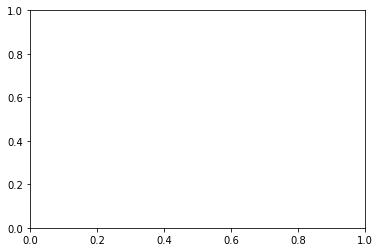

In [47]:
import xgboost as xgb

# 모델 선언
my_model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)

# 모델 훈련
my_model.fit(X_train, y_train, verbose=False)

# 모델 예측
y_pred = my_model.predict(X_test)   
    
import xgboost as xgb
import matplotlib.pyplot as plt

# num_trees : 그림을 여러개 그릴시 그림 번호
# rankdir : 트리의 방향, 디폴트는 위아래 방향
# rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
xgb.plot_tree(my_model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지 저장하고 싶다면
# fig.savefig('tree.png')

plt.show()